# Radial Class Exploration

In this notebook, we are going to import the Radial class from the hfradarpy package. Using this class, we can easily load Codar Tabular Format (CTF) files. CTF is a file format created by CODAR Ocean Sensors for use in their SeaSonde ocean current mapping radars. Additionally, this radial format is used by HELZEL Messtechnik GmbH in their WERA phased array systems as well as University of Hawaii LERA phased array radars.

In [1]:
from hfradarpy.radials import Radial

Let's see what the Radial class can do. The help() command is really useful for telling us about functions and classes. This code is not the best documented (yet), but it will help you get by for now.

In [3]:
help(Radial)

Help on class Radial in module hfradarpy.radials:

class Radial(hfradarpy.ctf.CTFParser)
 |  Radial(fname, replace_invalid=True, mask_over_land=False, empty_radial=False)
 |  
 |  Radial Subclass.
 |  
 |  This class should be used when loading a CODAR radial (.ruv) file. This class utilizes the generic LLUV class from
 |  ~/hfradarpy/ctf.py in order to load CODAR Radial files
 |  
 |  Method resolution order:
 |      Radial
 |      hfradarpy.ctf.CTFParser
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fname, replace_invalid=True, mask_over_land=False, empty_radial=False)
 |      Initialize the radial object
 |      :param fname: Full file path to the radial .ruv to be lodaded.
 |      :param replace_invalid: Replace invalid/dummy manufacturer fill values with NaN. <Default: True>
 |      :param mask_over_land - Mask radials that over land with NaN. <Default: False>
 |      :param empty_radial - Returns an empty Radial object. <Default:False>
 |      :re

Next we will import a couple basic packages that allow us to find the test radial data included with the hfradarpy package.

In [6]:
import os
from pathlib import Path

start_path = Path(os.path.abspath('')).parent.with_name('hfradarpy').resolve()
start_path

PosixPath('/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy')

We create two variables, radial_file and radial_file_qc, that contain the full file paths of the radial file that we want to look at (radial_file), and the path to the quality controlled radial file that we want to save (radial_file_qc). This toolbox allows us to export radial .ruv files into their original format for use in the manufacturer's software.

In [7]:
radial_file = start_path / 'data' / 'radials' / 'ruv' / 'SEAB' / 'RDLi_SEAB_2019_01_01_0200.ruv'
radial_file

PosixPath('/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0200.ruv')

In [8]:
radial_file_qc = start_path / 'data' / 'radials_qc' / 'ruv' / 'SEAB' / 'RDLi_SEAB_2019_01_01_0200.ruv'
radial_file_qc

PosixPath('/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials_qc/ruv/SEAB/RDLi_SEAB_2019_01_01_0200.ruv')

Now, we are going to load the radial file into the Radial class. It's very simple and takes one required input.

There are a few optional inputs as well.
* replace_invalid - Replace invalid/dummy manufacturer fill values with NaN. <Default: True>
* mask_over_land - Mask radials that over land with NaN. <Default: False>
* empty_radial - Returns an empty Radial object. <Default:False>

In [9]:
r = Radial(radial_file)

This is a list of all methods of a hfradarpy Radial instance.

## Radial File Information
* file_path - String of the file path including the filename
* file_name - String of the filename
* file_type - String of the filetype

## Radial Metadata File
* metadata - Dictionary of header and footer information

## Radial Table Data (Pandas Dataframe)
* data - Dataframe of radial data
* diagnostics_hardware - Dataframe of radial diagnostic data
* diagnostics_hardware - Dataframe of radial hardware data

## Quality Control tests
* qc_qartod_syntax (QC06) - QARTOD HF Radar Syntax Test
* qc_qartod_maximum_velocity (QC07) - QARTOD HF Radar Maximum Speed test
* qc_qartod_valid_location (QC08)- QARTOD HF Radar Location test
* qc_qartod_radial_count (QC09) - QARTOD HF Radar Radial Threshold test
* qc_qartod_spatial_median (QC10) - QARTOD HF Radar Spatial Median test
* qc_qartod_temporal_gradient (QC11) - QARTOD HF Radar Temporal Gradient test
* qc_qartod_avg_radial_bearing (QC12) - QARTOD HF Radar Average Radial Bearing test
* qc_qartod_primary_flag - QARTOD Primary Flag

## Export to new file format
* export - Export the Radial instance as either a new ruv file or netcdf by specifying file_type='radial' or 'netcdf' respectively... 
* eg. r.export(filename, file_type='radial')

# Radial File Information

In [10]:
r.file_name

'RDLi_SEAB_2019_01_01_0200.ruv'

In [11]:
r.file_path

'/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB'

In [12]:
r.file_type()

'radial'

# Radial Metadata Information

We can view the header and footer information in a dictionary format by doing the following:

In [13]:
r.metadata

OrderedDict([('CTF', '1.00'),
             ('FileType', 'LLUV rdls "RadialMap"'),
             ('LLUVSpec', '1.27  2017 01 13'),
             ('UUID', '2EDF086E-F67A-4137-AF0F-EF0200B97689'),
             ('Manufacturer', 'CODAR Ocean Sensors. SeaSonde'),
             ('Site', 'SEAB ""'),
             ('TimeStamp', '2019 01 01  02 00 00'),
             ('TimeZone', '"UTC" +0.000 0 "Atlantic/Reykjavik"'),
             ('TimeCoverage', '75.000 Minutes'),
             ('Origin', '40.3668167  -73.9735333'),
             ('GreatCircle', '"WGS84" 6378137.000  298.257223562997'),
             ('GeodVersion', '"CGEO" 1.85  2017 10 05'),
             ('LLUVTrustData', 'all  all lluv xyuv rbvd'),
             ('RangeStart', '2'),
             ('RangeEnd', '23'),
             ('RangeResolutionKMeters', '3.020300'),
             ('RangeCells', '31'),
             ('DopplerCells', '512'),
             ('DopplerInterpolation', '2'),
             ('AntennaBearing', '151.0 True'),
             ('Refer

# Radial Table Data
Dataframes will start with an index automatically generated by Pandas when the data is loaded into the dataframe. The second column for each dataframe will always be '%%.' This is a placeholder column that exists only to be used during export. Export will look for the column and comment out any row that includes a single '%.' This is to preserve the exact order of the radial file that was generated at the CODAR site.

In [14]:
r.data

,LOND,LATD,VELU,VELV,VFLG,...,RNGE,BEAR,VELO,HEAD,SPRC
0,-73.966093,40.420918,-0.472,-4.486,128,...,6.0406,6.0,4.511,186.0,2
1,-73.959952,40.420215,-0.446,-2.290,128,...,6.0406,11.0,2.333,191.0,2
2,-73.948027,40.417600,-2.594,-6.753,128,...,6.0406,21.0,7.234,201.0,2
3,-73.942334,40.415706,-0.546,-1.118,0,...,6.0406,26.0,1.244,206.0,2
4,-73.936879,40.413440,-1.764,-2.932,0,...,6.0406,31.0,3.422,211.0,2
...,...,...,...,...,...,...,...,...,...,...,...
699,-73.223362,40.199438,-9.250,2.737,0,...,66.4466,106.0,9.647,286.5,22
700,-74.187359,39.791377,3.827,13.470,128,...,66.4466,196.0,14.003,15.9,22
701,-74.578146,39.988638,8.297,6.813,128,...,66.4466,231.0,10.736,50.6,22
702,-73.164573,40.461853,-9.003,-1.342,0,...,69.4669,81.0,9.102,261.5,23


In [15]:
r.diagnostics_hardware

,TIME,RTMP,MTMP,XTRP,RUNT,...,TDAY,THRS,TMIN,TSEC,datetime
0,-35.0,23,35,0,39199,...,1,1,25,0,2019-01-01 01:25:00
1,-30.0,23,35,0,39498,...,1,1,30,0,2019-01-01 01:30:00
2,-25.0,23,35,0,39797,...,1,1,35,0,2019-01-01 01:35:00
3,-20.0,23,35,0,40096,...,1,1,40,0,2019-01-01 01:40:00
4,-15.0,23,35,0,40396,...,1,1,45,0,2019-01-01 01:45:00
5,-10.0,23,35,0,40695,...,1,1,50,0,2019-01-01 01:50:00
6,-5.0,23,35,0,40994,...,1,1,55,0,2019-01-01 01:55:00
7,0.0,23,35,0,41294,...,1,2,0,0,2019-01-01 02:00:00
8,5.0,23,35,0,41593,...,1,2,5,0,2019-01-01 02:05:00
9,10.0,23,35,0,41892,...,1,2,10,0,2019-01-01 02:10:00


In [16]:
r.diagnostics_radial

,TIME,AMP1,AMP2,PH13,PH23,...,TDAY,THRS,TMIN,TSEC,datetime
0,-1800,0.239,0.480,58.8,79.3,...,1,1,30,0,2019-01-01 01:30:00
1,-1200,0.218,0.502,59.0,81.3,...,1,1,40,0,2019-01-01 01:40:00
2,-600,0.240,0.438,59.1,80.2,...,1,1,50,0,2019-01-01 01:50:00
3,0,0.238,0.450,58.1,78.4,...,1,2,0,0,2019-01-01 02:00:00
4,600,0.247,0.476,58.9,77.9,...,1,2,10,0,2019-01-01 02:10:00
5,1200,0.243,0.481,57.8,79.9,...,1,2,20,0,2019-01-01 02:20:00
6,1800,0.260,0.464,58.9,77.5,...,1,2,30,0,2019-01-01 02:30:00


# Radial Quality Control Tests

We have implemented eight QARTOD radial tests defined in the IOOS QARTOD manual for HFR. Each test results in the following flags:

Source: https://cdn.ioos.noaa.gov/media/2017/12/HFR_QARTOD_Manual_05_26_16.pdf

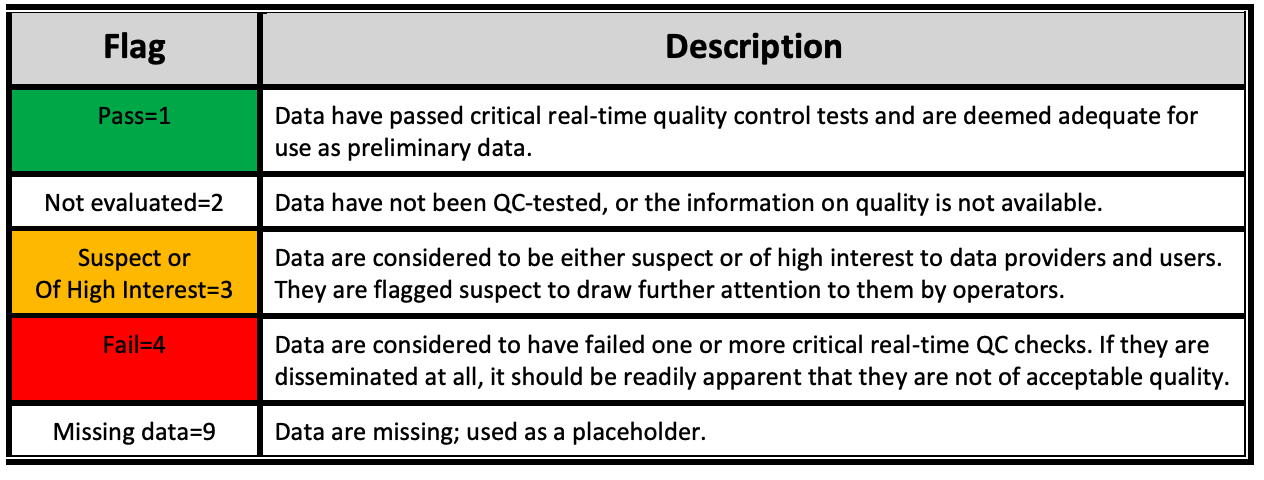


## QC Test Initialization
You must tell the instance that you are about to execute the qc tests. This is necessary in order to preserve the original .ruv structure of the raw radial files. This way, we can still utilize the manufacturer's tools as intended.

In [17]:
r.initialize_qc()

## Syntax

**Description:** A collection of tests ensuring proper formatting and existence of fields within a radial file.

**Test specifications:** Acceptable files types, site codes, coordinates, APM names, etc., must be presented. For example, the national network performs the following suite of tests:
* All radial files acquired by HFRNet portals report the data timestamp in the filename.
The filename timestamp must not be any more than 72 hours in the future relative to the
portals’ system time.
* The file name timestamp must match the timestamp reported within the file.
* Radial data tables (Lon, Lat, U, V, ...) must not be empty.
* Radial data table columns stated must match the number of columns reported for each
row (a useful test for catching partial or corrupted files).
* The site location must be within range: − 180 ≤ Longitude ≤ 180 − 90 ≤ Latitude ≤ 90.
* As a minimum, the following metadata must be defined:
    * File type (LLUV)
    * Site code
    * Timestamp
    * Site coordinates
    * Antenna pattern type (measured or idealized)
    * Time zone (only Coordinated Universal Time or Greenwich Mean Time accepted)

If a radial file is successfully loaded by the Radial class that file automatically passes the QARTOD Syntax test. 

In [18]:
r.qc_qartod_syntax()
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,BEAR,VELO,HEAD,SPRC,QC06
0,-73.966093,40.420918,-0.472,-4.486,128,...,6.0,4.511,186.0,2,1
1,-73.959952,40.420215,-0.446,-2.290,128,...,11.0,2.333,191.0,2,1
2,-73.948027,40.417600,-2.594,-6.753,128,...,21.0,7.234,201.0,2,1
3,-73.942334,40.415706,-0.546,-1.118,0,...,26.0,1.244,206.0,2,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,31.0,3.422,211.0,2,1


## Maximum Velocity Threshold
Ensures that a radial currend speed is not unrealistically high.

**Description:** The maximum radial speed threshold (RSPDMAX) represents the maximum reasonable surface radial
velocity for the given domain.

**Test Specifications:** The maximum total speed threshold is 1 m/s for the West
Coast of the United States and 3 m/s for the East/Gulf Coast domain. The threshold must vary by region. For
example, the presence of the Gulf Stream dictates the higher threshold on the East Coast.

**Default Max Threshold:** 250 cm/s

Flags (VLOC): 
* Fail = 4
    * Radial current speed exceeds the maximum radial speed threshold
* Pass = 1
    * Radial current speed is less than or equal to the maximum radial speed threshold.

In [19]:
help(r.qc_qartod_maximum_velocity)

Help on method qc_qartod_maximum_velocity in module hfradarpy.radials:

qc_qartod_maximum_velocity(radial_max_speed=250, radial_high_speed=150) method of hfradarpy.radials.Radial instance
    Integrated Ocean Observing System (IOOS) Quality Assurance of Real-Time Oceanographic Data (QARTOD)
    Max Threshold (Test 7)
    Ensures that a radial current speed is not unrealistically high.
    
    The maximum radial speed threshold (RSPDMAX) represents the maximum reasonable surface radial velocity
    for the given domain.
    
    Link: https://ioos.noaa.gov/ioos-in-action/manual-real-time-quality-control-high-frequency-radar-surface-current-data/
    :param threshold: Maximum Radial Speed (cm/s)
    :return:



In [20]:
r.qc_qartod_maximum_velocity(radial_max_speed=250, radial_high_speed=150) #cm/s
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,VELO,HEAD,SPRC,QC06,QC07
0,-73.966093,40.420918,-0.472,-4.486,128,...,4.511,186.0,2,1,1
1,-73.959952,40.420215,-0.446,-2.290,128,...,2.333,191.0,2,1,1
2,-73.948027,40.417600,-2.594,-6.753,128,...,7.234,201.0,2,1,1
3,-73.942334,40.415706,-0.546,-1.118,0,...,1.244,206.0,2,1,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,3.422,211.0,2,1,1


## Valid Location 
Removes radial vectors placed over land or in other unmeasureable areas.

**Description:** Radial vector coordinates are checked against a reference file containing information about which locations
are over land or in an unmeasurable area (for example, behind an island or point of land). Radials in these
areas will be flagged with a code (FLOC) in the radial file (+128 in CODAR radial files) and are not included in
total vector calculations.

**Test Specifications:**
For CODAR systems, the reference file is called AngSeg_XXXX.txt, where XXXX is the four-letter site code of the station and is located in the “RadialConfigs” folder. These vectors receive a code of +128 in the flag column of the radial text file. BF systems use pre-set grid locations for radials.

**Default Location Flag:** 128 (corresponds to CODAR AngSeg flag)

Flags (VLOC): 
* Fail = 4
    * Radial contains a user-defined location flag code in the radial file
* Pass = 1
    * Radial does not contain a user-defined location flag code in the radial file.

In [22]:
help(r.qc_qartod_valid_location)

Help on method qc_qartod_valid_location in module hfradarpy.radials:

qc_qartod_valid_location() method of hfradarpy.radials.Radial instance
    Integrated Ocean Observing System (IOOS) Quality Assurance of Real-Time Oceanographic Data (QARTOD)
    Valid Location (Test 8)
    Removes radial vectors placed over land or in other unmeasureable areas
    
    Radial vector coordinates are checked against a reference file containing information about which locations
    are over land or in an unmeasurable area (for example, behind an island or point of land). Radials in these
    areas will be flagged with a code (FLOC) in the radial file (+128 in CODAR radial files) and are not included
    in total vector calculations.
    
    Link: https://ioos.noaa.gov/ioos-in-action/manual-real-time-quality-control-high-frequency-radar-surface-current-data/
    :return:



In [21]:
r.qc_qartod_valid_location()
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,HEAD,SPRC,QC06,QC07,QC08
0,-73.966093,40.420918,-0.472,-4.486,128,...,186.0,2,1,1,4
1,-73.959952,40.420215,-0.446,-2.290,128,...,191.0,2,1,1,4
2,-73.948027,40.417600,-2.594,-6.753,128,...,201.0,2,1,1,4
3,-73.942334,40.415706,-0.546,-1.118,0,...,206.0,2,1,1,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,211.0,2,1,1,1


## Radial Count
Rejects radials in files with low radial counts (poor radial map coverage)

**Description:** The number of radials (RCNT) in a radial file must be above a threshold value RCNT_MIN to pass the test and above a value RC_LOW to not be considered suspect. If the number of radials is below the minimum level, it indicates a problem with data collection. In this case, the file should be rejected and none of the radials used for total vector processing.

**Test Specifications:** The RC_LOW threshold may be based on the national
network performance metric threshold value of 300. The choice of 300 radial solutions came from grouping
radial files over a certain time period from all stations, looking at the cumulative density function for counts,
and selecting a value around 10%. However, this threshold does not work for all stations. A custom value for
a site might be found by following the same procedure for the individual station.

**Default Max Threshold:** min_radials = 150; low_radials = 300 

Flags (VLOC): 
* Fail = 4
    * Number of radials is less than min_radials
* Suspect = 3
    * Number of radials is greater than min_radials but less than or equal to low_radials
* Pass = 1
    * Number of radials is greater than low_radials.
    
This will not add an extra column to the file. Rather it will add the test result a new key, qc_qartod_radial_count, to the header file of a newly exported radial.

In [23]:
help(r.qc_qartod_radial_count)

Help on method qc_qartod_radial_count in module hfradarpy.radials:

qc_qartod_radial_count(radial_min_count=150, radial_low_count=300) method of hfradarpy.radials.Radial instance
    Integrated Ocean Observing System (IOOS) Quality Assurance of Real-Time Oceanographic Data (QARTOD)
    Radial Count (Test 9)
    Rejects radials in files with low radial counts (poor radial map coverage).
    
    The number of radials (RCNT) in a radial file must be above a threshold value RCNT_MIN to pass the test and
    above a value RC_LOW to not be considered suspect. If the number of radials is below the minimum level,
    it indicates a problem with data collection. In this case, the file should be rejected and none of the
    radials used for total vector processing.
    
    Link: https://ioos.noaa.gov/ioos-in-action/manual-real-time-quality-control-high-frequency-radar-surface-current-data/
    :param min_radials: Minimum radial count threshold below which the file should be rejected. min_radia

In [24]:
r.qc_qartod_radial_count(radial_low_count=140, radial_min_count=50)
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,SPRC,QC06,QC07,QC08,QC09
0,-73.966093,40.420918,-0.472,-4.486,128,...,2,1,1,4,1
1,-73.959952,40.420215,-0.446,-2.290,128,...,2,1,1,4,1
2,-73.948027,40.417600,-2.594,-6.753,128,...,2,1,1,4,1
3,-73.942334,40.415706,-0.546,-1.118,0,...,2,1,1,1,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,2,1,1,1,1


## Spatial Median 
Reduces outlier velocities in radials.

**Description:** 
RV is the radial velocity
NV is a set of radial velocities for neighboring radial cells (cells within radius of 'radial_smed_range_cell_limit' * Range Step (km)and whose vector bearing (angle of arrival at site) is also within 'radial_smed_angular_limit' degrees of the source vector's bearing)

**Test Specifications:** Required to pass the test: |RV - median(NV)| <= radial_smed_current_difference

Flags (VLOC): 
* Fail = 4
    * Difference between the vector velocity and the median velocity is greater than the threshold.
* Pass = 1
    * If the difference between the vector velocity and the median velocity is less or equal to the threshold, the vector value is CHANGED to the median value.

In [25]:
help(r.qc_qartod_spatial_median)

Help on method qc_qartod_spatial_median in module hfradarpy.radials:

qc_qartod_spatial_median(radial_smed_range_cell_limit=2.1, radial_smed_angular_limit=10, radial_smed_current_difference=30) method of hfradarpy.radials.Radial instance
    Integrated Ocean Observing System (IOOS) Quality Assurance of Real-Time Oceanographic Data (QARTOD)
    Spatial Median (Test 10)
    Ensures that the radial velocity is not too different from nearby radial velocities.
    RV is the radial velocity
    NV is a set of radial velocities for neighboring radial cells (cells within radius of 'radial_smed_range_cell_limit' * Range Step (km)
    and whose vector bearing (angle of arrival at site) is also within 'radial_smed_angular_limit' degrees of the source vector's bearing)
    Required to pass the test: |RV - median(NV)| <= radial_smed_current_difference
    Link: https://ioos.noaa.gov/ioos-in-action/manual-real-time-quality-control-high-frequency-radar-surface-current-data/
    :param RCLim: multiple

In [26]:
r.qc_qartod_spatial_median(radial_smed_range_cell_limit=2.1, radial_smed_angular_limit=10, radial_smed_current_difference=30)
r.data.head()

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


,LOND,LATD,VELU,VELV,VFLG,...,QC06,QC07,QC08,QC09,QC10
0,-73.966093,40.420918,-0.472,-4.486,128,...,1,1,4,1,1
1,-73.959952,40.420215,-0.446,-2.290,128,...,1,1,4,1,1
2,-73.948027,40.417600,-2.594,-6.753,128,...,1,1,4,1,1
3,-73.942334,40.415706,-0.546,-1.118,0,...,1,1,1,1,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,1,1,1,1,1


## Temporal Gradient  
Checks for satisfactory temporal rate of change of radial components.

**Description:** 
Test determines whether changes between successive radial velocity measurements at a particular range and bearing cell are within an acceptable range. GRADIENT_TEMP = |Rt-1 - Rt|

**Test Specifications:** Required to pass the test: |RV - median(NV)| <= radial_smed_current_difference

Flags (VLOC): 
* Fail = 4
    * The temporal change between successive radial velocities exceeds the gradient failure threshold.

* Suspect = 3
    * The temporal change between successive radial velocities is less than the gradient failure threshold but exceeds the gradient warn threshold.
    
* Pass = 1
    * The temporal change between successive radial velocities is less than the gradient warn threshold.

In [28]:
help(r.qc_qartod_temporal_gradient)

Help on method qc_qartod_temporal_gradient in module hfradarpy.radials:

qc_qartod_temporal_gradient(r0, gradient_temp_fail=54, gradient_temp_warn=36) method of hfradarpy.radials.Radial instance
    Integrated Ocean Observing System (IOOS) Quality Assurance of Real-Time Oceanographic Data (QARTOD)
    Temporal Gradient (Test 11)
    Checks for satisfactory temporal rate of change of radial components
    
    Test determines whether changes between successive radial velocity measurements at a particular range
    and bearing cell are within an acceptable range. GRADIENT_TEMP = |Rt-1 - Rt|
    
    Flags Condition Codable Instructions
    Fail = 4 The temporal change between successive radial velocities exceeds the gradient failure threshold.
    
    If GRADIENT_TEMP ≥ GRADIENT_TEMP_FAIL,
    flag = 4
    
    Suspect = 3 The temporal change between successive radial velocities is less than the gradient failure threshold but exceeds the gradient warn threshold.
    
    If GRADIENT_TEM

In [27]:
# r0 set so we can demonstrate temporal gradient test
r0 = '../hfradar/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0000.ruv'

In [29]:
r.qc_qartod_temporal_gradient(r0, gradient_temp_fail=54, gradient_temp_warn=36)
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,QC07,QC08,QC09,QC10,QC11
0,-73.966093,40.420918,-0.472,-4.486,128,...,1,4,1,1,2
1,-73.959952,40.420215,-0.446,-2.290,128,...,1,4,1,1,2
2,-73.948027,40.417600,-2.594,-6.753,128,...,1,4,1,1,2
3,-73.942334,40.415706,-0.546,-1.118,0,...,1,1,1,1,2
4,-73.936879,40.413440,-1.764,-2.932,0,...,1,1,1,1,2


## Average Radial Bearing
Check that the average radial bearing remains relatively constant (Roarty et al. 2012).

**Description:** 
It is expected that the average of all radial velocity bearings AVG_RAD_BEAR obtained during a sample interval (e.g., 1 hour) should be close to a reference bearing REF_RAD_BEAR and not vary beyond warning or failure thresholds.

**Test Specifications:**  RAD_BEAR_DIF_FAIL =30°, RAD_BEAR DIF_WARN = 15°

Flags (VLOC): 
* Fail = 4
    * The absolute difference between the average radial bearing and a reference bearing exceeds a failure threshold.

* Suspect = 3
    * The absolute difference between the average radial bearing and a reference bearing is less than the failure threshold but exceeds the warning threshold.
    
* Pass = 1
    * The absolute difference between the average radial bearing and a reference bearing is less than the warning threshold.

In [30]:
help(r.qc_qartod_avg_radial_bearing)

Help on method qc_qartod_avg_radial_bearing in module hfradarpy.radials:

qc_qartod_avg_radial_bearing(reference_bearing, warning_threshold=15, failure_threshold=30) method of hfradarpy.radials.Radial instance
    Integrated Ocean Observing System (IOOS) Quality Assurance of Real-Time Oceanographic Data (QARTOD)
    Valid Location (Test 12)
    Check that the average radial bearing remains relatively constant (Roarty et al. 2012).
    
    It is expected that the average of all radial velocity bearings AVG_RAD_BEAR obtained during a sample
    interval (e.g., 1 hour) should be close to a reference bearing REF_RAD_BEAR and not vary beyond warning
    or failure thresholds.
    :return:



In [31]:
r.qc_qartod_avg_radial_bearing(reference_bearing=151, warning_threshold=15, failure_threshold=30)
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,QC08,QC09,QC10,QC11,QC12
0,-73.966093,40.420918,-0.472,-4.486,128,...,4,1,1,2,1
1,-73.959952,40.420215,-0.446,-2.290,128,...,4,1,1,2,1
2,-73.948027,40.417600,-2.594,-6.753,128,...,4,1,1,2,1
3,-73.942334,40.415706,-0.546,-1.118,0,...,1,1,1,2,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,1,1,1,2,1


## Primary Flag 
Create primary flag column that gives the highest level of failure for each row.


In [32]:
help(r.qc_qartod_primary_flag)

Help on method qc_qartod_primary_flag in module hfradarpy.radials:

qc_qartod_primary_flag(include=None) method of hfradarpy.radials.Radial instance
     A primary flag is a single flag set to the worst case of all QC flags within the data record.
    :param include: list of quality control tests which should be included in the primary flag
    :return:



In [33]:
r.qc_qartod_primary_flag()
r.data.head()

,LOND,LATD,VELU,VELV,VFLG,...,QC09,QC10,QC11,QC12,PRIM
0,-73.966093,40.420918,-0.472,-4.486,128,...,1,1,2,1,4
1,-73.959952,40.420215,-0.446,-2.290,128,...,1,1,2,1,4
2,-73.948027,40.417600,-2.594,-6.753,128,...,1,1,2,1,4
3,-73.942334,40.415706,-0.546,-1.118,0,...,1,1,2,1,1
4,-73.936879,40.413440,-1.764,-2.932,0,...,1,1,2,1,1


Finally, lets export the qc'ed radial file back to the CODAR .ruv format

In [34]:
r.export(radial_file_qc, 'radial')